<a href="https://colab.research.google.com/github/masa512/ece558/blob/main/hw4_p6_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part D

In [ ]:
from skimage.data import shepp_logan_phantom 
from skimage.transform import resize,radon
import matplotlib.pyplot as plt
import numpy as np

N = 32 # pick whatever size
X = resize(shepp_logan_phantom(), (N,N))

Text(0.5, 1.0, '32 by 32 Phantom Input')

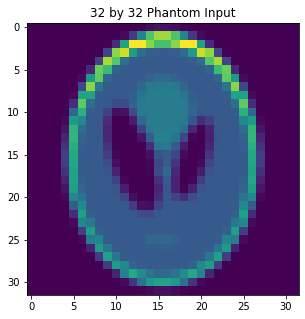

In [ ]:
# Plot the image
f = plt.figure(figsize=(5,5))
plt.imshow(X)
plt.title(f"{N} by {N} Phantom Input")

In [ ]:
# Now we will define the function to generate the T matrix
def projmtx(N,thetas):
  #Initialize bj's as columns
  B = np.diag(np.ones(N*N))
  M = thetas.shape[0]
  # Radon returns t by ang
  sinos = np.array([radon(B[:,j].reshape(N,N),theta=thetas,circle=False).reshape((-1)) for j in range(N*N)]).T
  
  return sinos

In [ ]:
thetas = np.linspace(0., 180., N, endpoint=False).reshape((-1,1))
T = projmtx(N,thetas)

(1472, 1)


Text(0.5, 1.0, 'skimage')

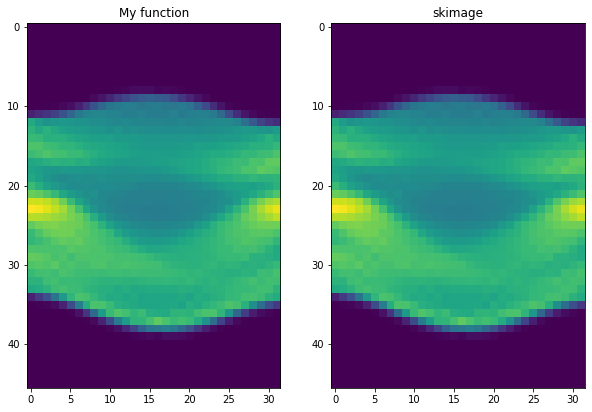

In [ ]:
# Apply the matrix for the input given
x = X.reshape((-1,1))
y = T @ x

# Print y shape
print(y.shape)

# Reshape y to shoot out t by ang
Y = y.reshape(-1,thetas.shape[0])

# We will also generate one using the built in skimage function 
Y_gt = radon(X,thetas,circle=False)

# Print the resulting sinogram
f,axes = plt.subplots(1,2,figsize=(10,10))
axes = np.ravel(axes)
axes[0].imshow(Y)
axes[0].set_title("My function")
axes[1].imshow(Y_gt)
axes[1].set_title("skimage")

# Part E 

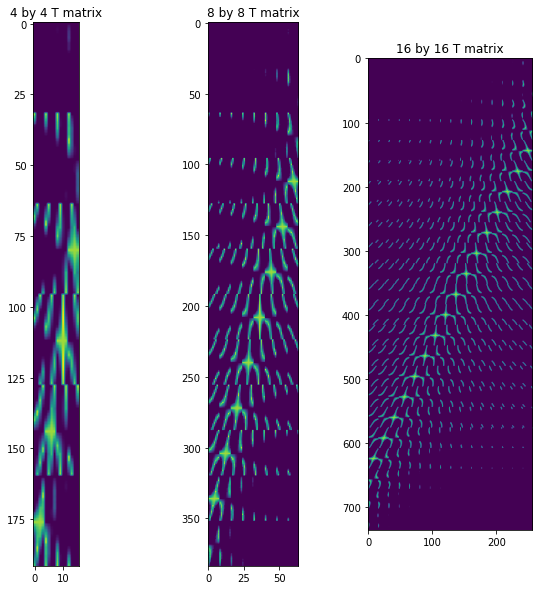

In [ ]:
# We will just plot the T for N = 4,8,16

Ns = [4,8,16]
f,axes = plt.subplots(1,3,figsize=(10,10))

for i,ax in enumerate(axes):
  N = Ns[i]
  ax.imshow(projmtx(N,thetas))
  ax.set_title(f'{N} by {N} T matrix')


# Part F

Text(0.5, 1.0, 'Backprojected')

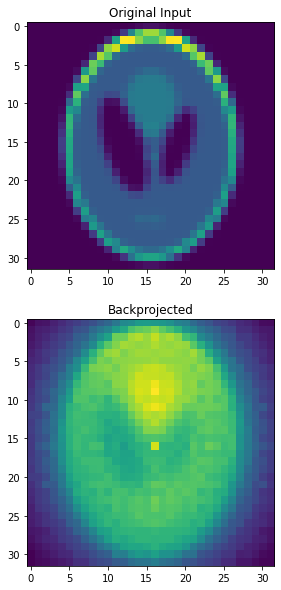

In [ ]:
# Backprojection

N = 32 # pick whatever size
X = resize(shepp_logan_phantom(), (N,N))

# Forward
thetas = np.linspace(0., 180., N, endpoint=False).reshape((-1,1))
T = projmtx(N,thetas)

x = X.reshape((-1,1))
y = T @ x

# Backproj
x = T.T@y
Xbp = x.reshape(N,N)

# Plot
f,axes = plt.subplots(2,1,figsize=(10,10))
axes[0].imshow(X)
axes[0].set_title('Original Input')

axes[1].imshow(Xbp)
axes[1].set_title('Backprojected')

# Problem 7 Part a

In [ ]:
# We will use the above implementations to perform "Filtered" backprojection
def ramp_filter(L):
  # lets assume N is even
  v = np.arange(L)
  v = abs(v - L//2)
  return np.fft.ifftshift(v)


def fbp(y,T,thetas):

  # Reshape y into t vs theta
  Y = y.reshape(-1,thetas.shape[0])

  # Take fft along axis 0
  fY = np.fft.fft(Y,axis=0)

  # Multiply by the ramp filter
  fR = ramp_filter(Y.shape[0]).reshape(-1,1)
  fYR = fY*fR
  

  # Take inversefft and apply T.T
  filtered_Y = np.fft.ifft(fYR,axis=0)
  Xfbp = (T.T)@(filtered_Y.reshape(-1,1))
  return Xfbp

/usr/local/lib/python3.8/dist-packages/skimage/transform/radon_transform.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  R = np.array([[cos_a, sin_a, -center * (cos_a + sin_a - 1)],


Text(0.5, 1.0, 'FBP')

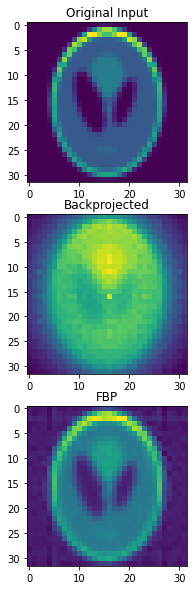

In [ ]:
# Backprojection

N = 32 # pick whatever size
X = resize(shepp_logan_phantom(), (N,N))

# Forward
thetas = np.linspace(0., 180., N, endpoint=False).reshape((-1,1))
T = projmtx(N,thetas)

x = X.reshape((-1,1))
y = T @ x

# Backproj
x = T.T@y
Xbp = x.reshape(N,N)

# Filtered Backproj
x = fbp(y,T,thetas)
Xfbp = x.reshape(N,N)

# Plot
f,axes = plt.subplots(3,1,figsize=(10,10))
axes[0].imshow(X)
axes[0].set_title('Original Input')

axes[1].imshow(Xbp)
axes[1].set_title('Backprojected')

axes[2].imshow(np.real(Xfbp))
axes[2].set_title('FBP')

# Problem 7 Part b

In [ ]:
# We will call the constant image of 32 by 32
N = 32 # pick whatever size
X = resize(shepp_logan_phantom(), (N,N))


In [ ]:
# Define different angle resolution
N_theta = [16,32,64,128]


### Regular Backprojection

/usr/local/lib/python3.8/dist-packages/skimage/transform/radon_transform.py:110: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  R = np.array([[cos_a, sin_a, -center * (cos_a + sin_a - 1)],


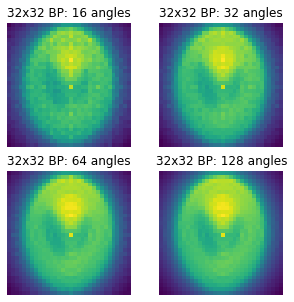

In [ ]:
f,axes = plt.subplots(2,2,figsize=(5,5))
axes = np.ravel(axes)

for i,n in enumerate(N_theta):
  
  thetas = np.linspace(0., 180., n, endpoint=False).reshape((-1,1))
  # Projection matrix
  T = projmtx(N,thetas)

  # Project!
  y = T @ X.reshape(-1,1)

  # back projection
  xbp = T.T @ y

  axes[i].imshow(xbp.reshape(N,N))
  axes[i].set_title(f'{N}x{N} BP: {n} angles')
  axes[i].axis('off')

### Filtered backprojection

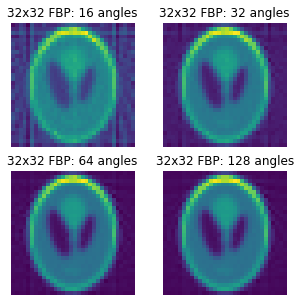

In [ ]:
f,axes = plt.subplots(2,2,figsize=(5,5))
axes = np.ravel(axes)

for i,n in enumerate(N_theta):
  
  thetas = np.linspace(0., 180., n, endpoint=False).reshape((-1,1))
  # Projection matrix
  T = projmtx(N,thetas)

  # Project!
  y = T @ X.reshape(-1,1)

  # filtered back projection
  x = fbp(y,T,thetas)
  Xfbp = x.reshape(N,N)

  axes[i].imshow(np.real(Xfbp))
  axes[i].set_title(f'{N}x{N} FBP: {n} angles')
  axes[i].axis('off')